<a href="https://colab.research.google.com/github/MartinO32/PP1_grupo23/blob/google_colab/qualivino_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div align="center">
    <img src=https://drive.google.com/uc?id=1WyDxrsklVeJ3e4MTWCM6AF8JMeSNO1NC "Copas con vinos, uvas en plato de madera, minibarrica y botella" style="width: 600px; height: 300px; border-radius: 10px;">
    <h1 style="font-family: Arial, sans-serif; font-size: 32px; font-weight: bold; margin-top: 20px; text-align: center;">Explorando la calidad del vino</h1>
    <h2 style="font-family: Arial, sans-serif; font-size: 20px; font-weight: normal; text-align: center;">Una aproximación a través de técnicas de procesamiento de datos</h2>
</div>


<br>El objetivo de este trabajo es establecer, por medio de técnicas de procesamiento de datos, las variables más influyentes en la calidad sensorial del vino.<br>
Se analiza una variable dependiente (calidad) y diez variables independientes: acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos, y alcohol.<br>
Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino tinto del vino portugués "Vinho Verde".
Los conjuntos de datos utilizados en este proyecto son provenientes del Machine Learning Repository de UCI. Si deseas obtener más información acerca de los mismos, puedes consultar el siguiente enlace: [UCI Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality).

 # 1. Preparacion de datos

## 1.1 Importacion de datos

In [2]:
import pandas as pd


In [3]:
#tablas a importar
tablas = {'tinto':'https://drive.google.com/uc?id=1g7yjnBcDKV41VHfiKFrT4PK1tWNcQIeE',
          'blanco':'https://drive.google.com/uc?id=1_M9b5on3OkszHQQAtP2LCD3AjM7BIkvv'}

archivos = []

#Importar los archivos CSV y guardarlos en una lista
for tabla in tablas.values():
    datos = pd.read_csv(tabla,
                        sep = ';',
                        encoding='latin-1',
                        low_memory=False)
    archivos.append(datos)

#Desempaquetado de archivos importados
vino_tinto,vino_blanco = archivos[:2]

## 1.2 Descubrimiento de datos

In [4]:
# Cuántas filas y columnas tienen los conjuntos de datos
print("Información sobre las filas y columnas de los conjuntos de datos:")
print(f"--> Vino tinto\nFilas: {vino_tinto.shape[0]}\nColumnas: {vino_tinto.shape[1]}")
print("----------------------")
print(f"--> Vino blanco\nFilas: {vino_blanco.shape[0]}\nColumnas: {vino_blanco.shape[1]}")

Información sobre las filas y columnas de los conjuntos de datos:
--> Vino tinto
Filas: 1599
Columnas: 12
----------------------
--> Vino blanco
Filas: 4898
Columnas: 12


In [5]:
#primeros diez registros data set tinto
vino_tinto.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
#primeros diez registros data set blanco
vino_blanco.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
# Resumen del dataset de vino tinto
vino_tinto.info()
vino_tinto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Resumen del dataset de vino blanco
vino_blanco.info()
vino_blanco.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 1.3 Eliminación de duplicados

In [9]:
# Función para verificar y eliminar duplicados en un dataset
def verificar_duplicados(dataset_nombre, dataset):
    print(f"Análisis de duplicados en el conjunto de datos {dataset_nombre.upper()}:")

    duplicados = dataset.duplicated().any()
    print(f"¿Hay duplicados? {duplicados}")

    cantidad_duplicados = dataset.duplicated().sum()
    print(f"Cantidad de duplicados: {cantidad_duplicados}")

    dataset = dataset.drop_duplicates()

    duplicados_despues = dataset.duplicated().any()
    print(f"¿Hay duplicados después de eliminarlos? {duplicados_despues}")

    print()  # Salto de línea

    return dataset

# Uso de la función para el conjunto de vino tinto
vino_tinto_sd = pd.DataFrame(verificar_duplicados("vino tinto", vino_tinto))

# Uso de la función para el conjunto de vino blanco
vino_blanco_sd = pd.DataFrame(verificar_duplicados("vino blanco", vino_blanco))

Análisis de duplicados en el conjunto de datos VINO TINTO:
¿Hay duplicados? True
Cantidad de duplicados: 240
¿Hay duplicados después de eliminarlos? False

Análisis de duplicados en el conjunto de datos VINO BLANCO:
¿Hay duplicados? True
Cantidad de duplicados: 937
¿Hay duplicados después de eliminarlos? False



## 1.4  Transformacion y consolidacion de los datos

In [10]:
# Agrego nueva columna "categoria"
# Se asigna el valor "rojo" a todos los registros en el DataFrame vino_tinto y ...
# ... el valor "blanco" a todos los registros en el DataFrame vino_blanco

vino_tinto_sd.loc[:,"categoria"] = "rojo"
vino_blanco_sd.loc[:,"categoria"] = "blanco"

# Concatenación de los conjuntos de datos de vino tinto y vino blanco EN DF_VINOS
df_vinos = pd.concat([vino_tinto_sd, vino_blanco_sd], axis=0, ignore_index=True)  # Concatenación por filas

#validacion de la integracion

def validar_filas(filas_esperadas, df_filas):
    if df_filas == filas_esperadas:
        print("La validación de filas fue exitosa")
    else:
        print("La validación de filas no se realizó correctamente")
        print(f"Filas esperadas: {filas_esperadas}")
        print(f"Filas encontradas: {df_filas}")


def validar_columnas(columnas_esperadas, columnas_df):
    columnas_faltantes = set(columnas_esperadas) - set(columnas_df)

    if columnas_faltantes:
        print("\nLa validación de columnas no se realizó correctamente. Faltan las siguientes columnas:")
        for columna in columnas_faltantes:
            print(columna)
    else:
        print("\nLa validación de columnas fue exitosa. Todas las columnas esperadas están presentes en el DataFrame resultante.")


def validar_integracion(dataset1, dataset2, dataset_integrado):
    # Validación de filas
    filas_esperadas = dataset1.shape[0] + dataset2.shape[0]
    dataset_integrado_filas = dataset_integrado.shape[0]
    validar_filas(filas_esperadas, dataset_integrado_filas)

    # Validación de columnas
    columnas_esperadas = vino_tinto.columns
    dataset_integrado_columnas = dataset_integrado.columns
    validar_columnas(columnas_esperadas, dataset_integrado_columnas)

validar_integracion(vino_tinto_sd, vino_blanco_sd, df_vinos)

La validación de filas fue exitosa

La validación de columnas fue exitosa. Todas las columnas esperadas están presentes en el DataFrame resultante.


In [11]:
# Diccionario de nuevos nombres de columnas
nuevos_nombres_col = {
    "fixed acidity": "acidez_fija",
    "volatile acidity": "acidez_volatil",
    "citric acid": "acido_citrico",
    "residual sugar": "azucar_residual",
    "chlorides": "cloruros",
    "free sulfur dioxide": "dioxido_azufre_libre",
    "total sulfur dioxide": "dioxido_azufre_total",
    "density": "densidad",
    "sulphates": "sulfatos",
    "quality": "calidad"
}

# Renombrar columnas del DataFrame df_vinos
df_vinos = df_vinos.rename(columns=nuevos_nombres_col)

In [12]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidez_fija           5320 non-null   float64
 1   acidez_volatil        5320 non-null   float64
 2   acido_citrico         5320 non-null   float64
 3   azucar_residual       5320 non-null   float64
 4   cloruros              5320 non-null   float64
 5   dioxido_azufre_libre  5320 non-null   float64
 6   dioxido_azufre_total  5320 non-null   float64
 7   densidad              5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulfatos              5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  calidad               5320 non-null   int64  
 12  categoria             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


**Observaciones Finales:**

El dataset consta de 5320 filas y 12 columnas. Todos los valores en las columnas tienen conteo no nulo. Los tipos de datos de las columnas son principalmente float64, excepto la columna "calidad" (tipo int64), y la columna categoria (tipo objetc/category). El tamaño ocupado en memoria es aproximadamente 498.9 KB.

## 1.5 Almacenamiento data set

In [13]:
ruta_archivo_final = './df_vinos.csv'

try:
    df_vinos.to_csv(ruta_archivo_final, index=False)
    df_guardado = pd.read_csv(ruta_archivo_final)

    if df_vinos.equals(df_guardado):
        print("El dataset ha sido preparado y está listo para su análisis.")
    else:
        print("Error: Los datos no coinciden después del guardado.")
except Exception as e:
    print(f"Error al guardar o leer el archivo CSV: {str(e)}")

El dataset ha sido preparado y está listo para su análisis.


# 2. Análisis exploratorio de datos

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 2.1 identificación de tipos de datos

In [15]:
df_vinos.dtypes

acidez_fija             float64
acidez_volatil          float64
acido_citrico           float64
azucar_residual         float64
cloruros                float64
dioxido_azufre_libre    float64
dioxido_azufre_total    float64
densidad                float64
pH                      float64
sulfatos                float64
alcohol                 float64
calidad                   int64
categoria                object
dtype: object

## 2.2 Estadísticas descriptivas en el conjunto de datos

In [16]:
#Tabla de medias, desviaciones y cuartiles
df_vinos.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
# Medias segun categoria de vinos
def_tinto = df_vinos[df_vinos['categoria'] == 'rojo'].mean( numeric_only=True  )
def_blanco = df_vinos[df_vinos['categoria'] == 'blanco'].mean( numeric_only=True  )

resultado = pd.concat([def_blanco, def_tinto], axis=1)
resultado = resultado.rename(columns={0: 'Blanco', 1: 'Tinto'})
resultado

,Blanco,Tinto
acidez_fija,6.839346,8.310596
acidez_volatil,0.280538,0.529478
acido_citrico,0.334332,0.272333
azucar_residual,5.914819,2.523400
cloruros,0.045905,0.088124
dioxido_azufre_libre,34.889169,15.893304
dioxido_azufre_total,137.193512,46.825975
densidad,0.993790,0.996709
pH,3.195458,3.309787
sulfatos,0.490351,0.658705


## 2.3 Distribucion de variables

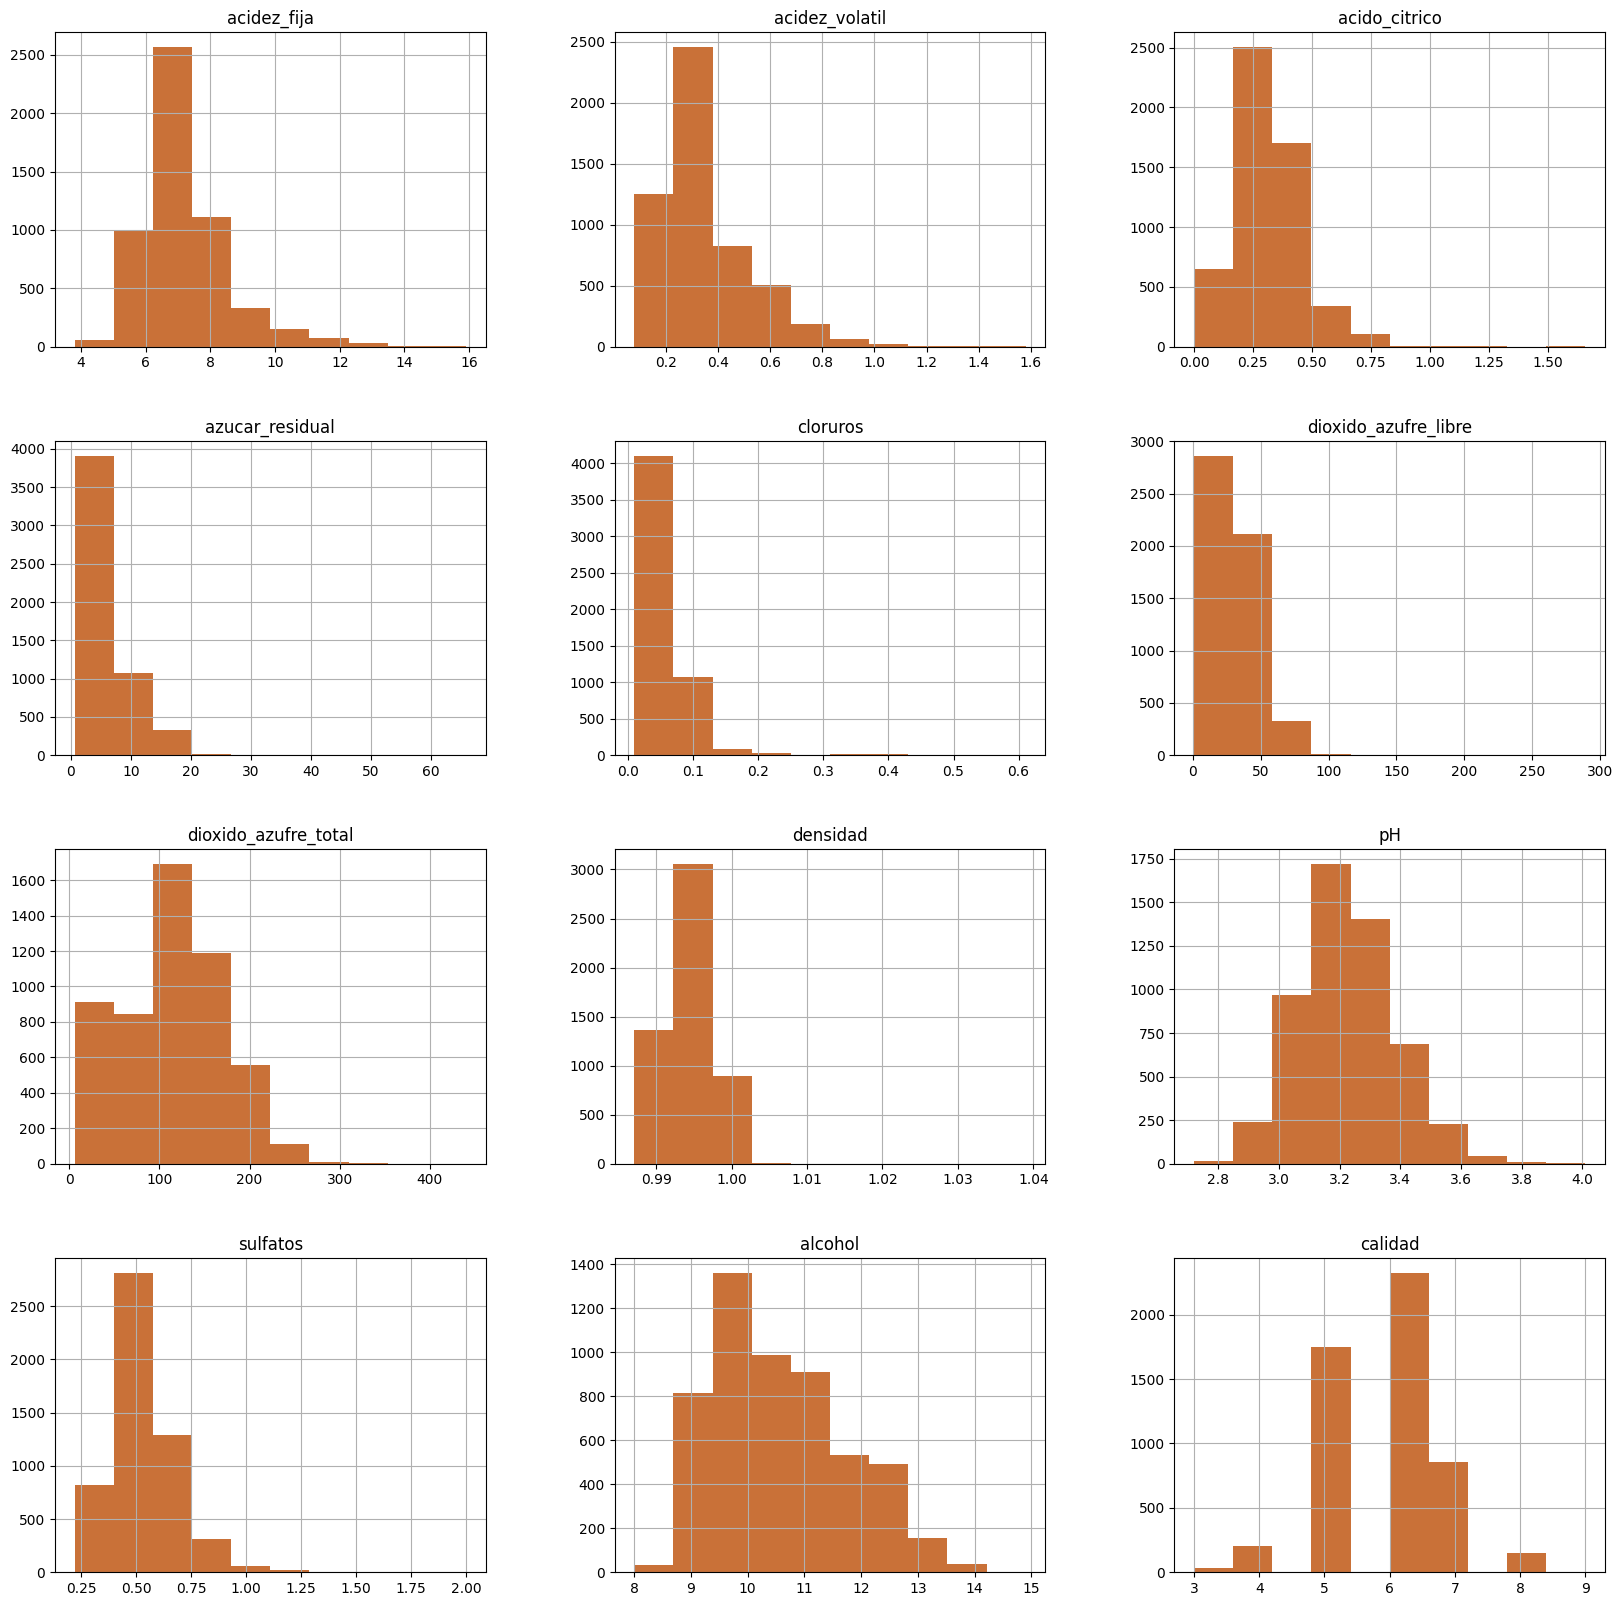

In [18]:
#Histogramas de cada una de las variables
df_vinos.hist(figsize=(20,20), color='#C97138')
plt.show()

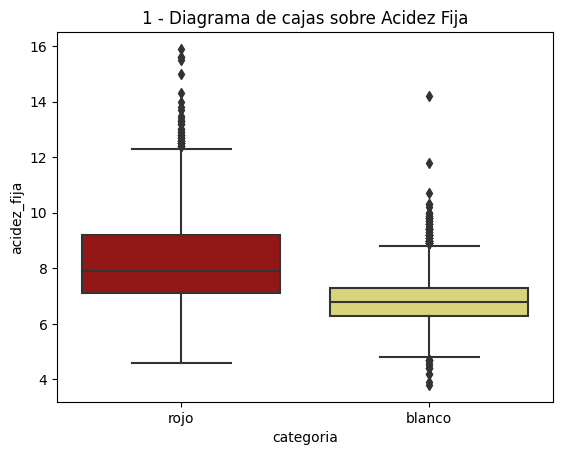

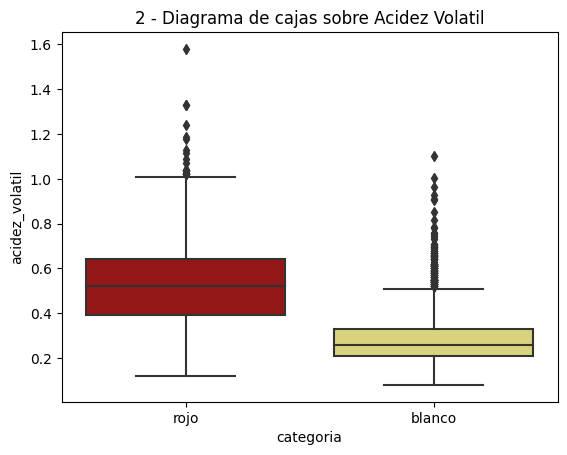

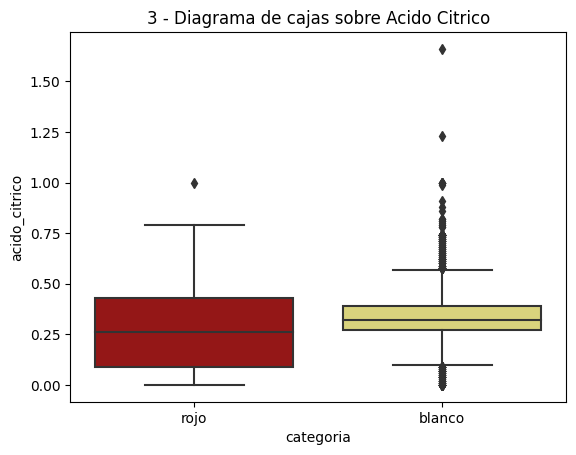

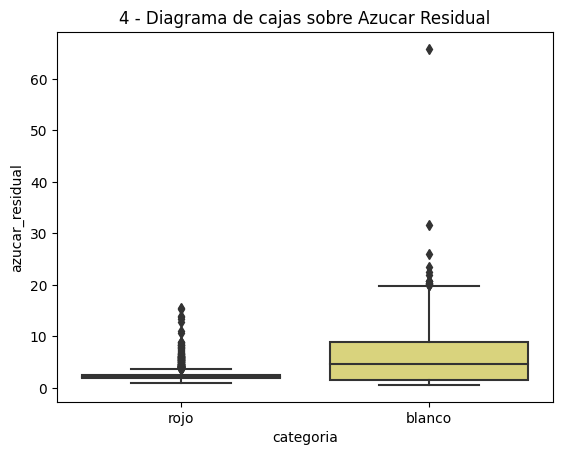

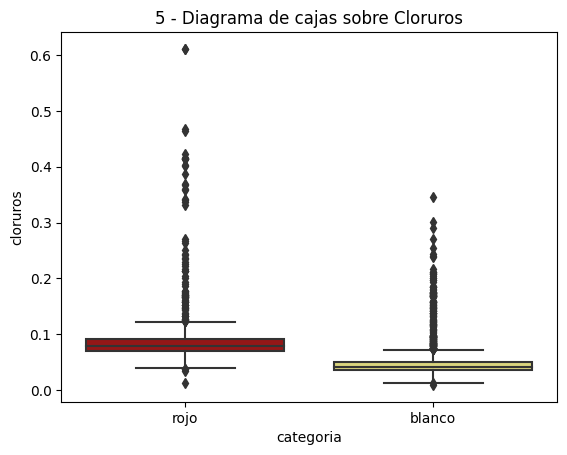

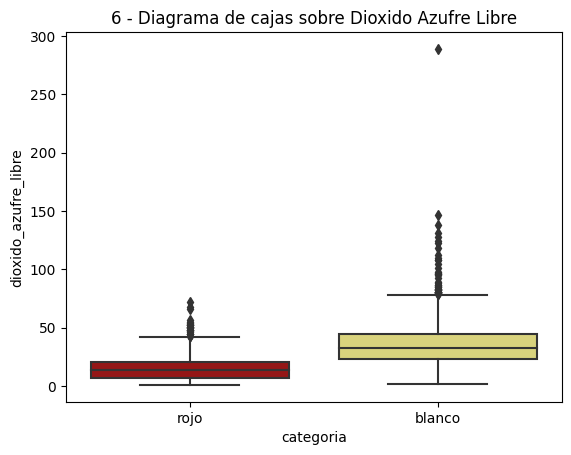

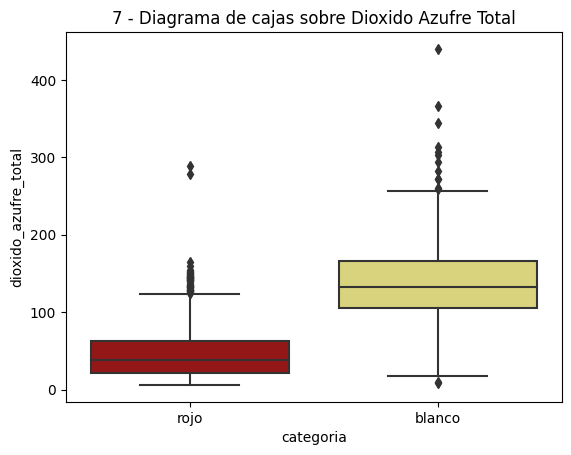

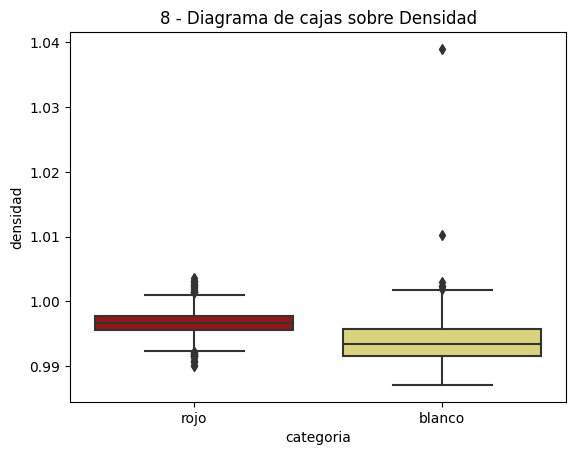

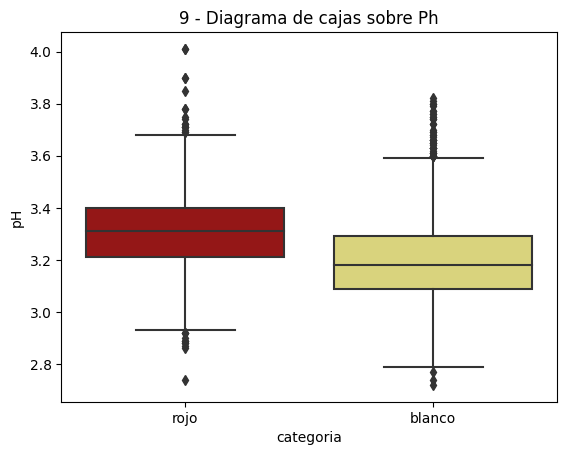

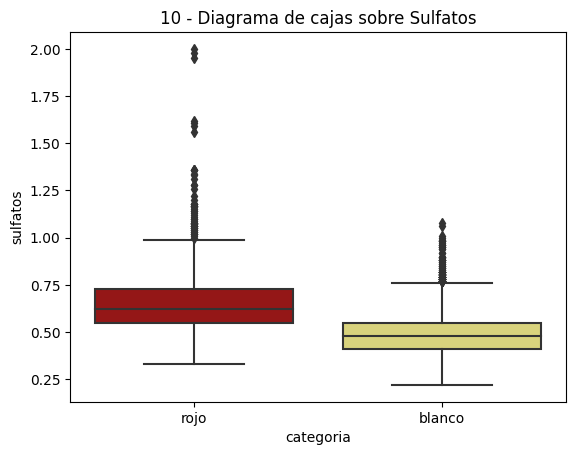

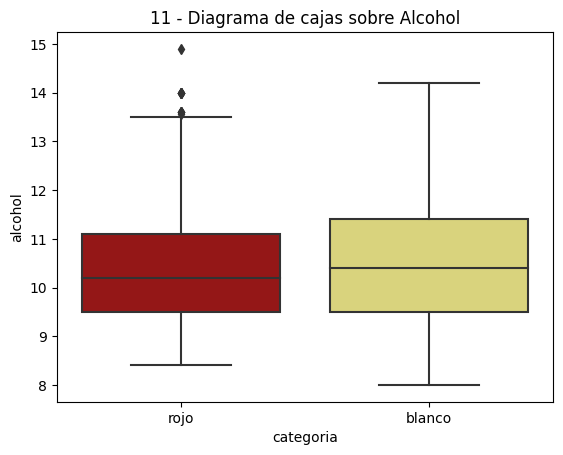

In [19]:
#Diagramas de Caja
#Mostramos las distintas variables en relación a las categorias de vinos
columnas = list(df_vinos.columns.values)
for i in range(len(columnas)-2):
    titulo = (columnas[i].split('_'))
    grafico = sns.boxplot(df_vinos, x=columnas[12], y=columnas[i],palette=['#a90202', '#e8e06e'])
    if len(titulo) == 2:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()} {titulo[1].capitalize()}')
    elif len(titulo) == 3:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()} {titulo[1].capitalize()} {titulo[2].capitalize()}')
    else:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()}')
    plt.show()


## 2.4 Revisión de la variable target / objetivo

In [20]:
#Examinamos la variable calidad
calidad = df_vinos['calidad']
calidad

0       5
1       5
2       5
3       6
4       5
       ..
5315    6
5316    5
5317    6
5318    7
5319    6
Name: calidad, Length: 5320, dtype: int64

In [21]:
# Tabla de frecuencias absoluta segun calidad
cantidad_por_calidad = df_vinos['calidad'].value_counts()
cantidad_por_calidad

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: calidad, dtype: int64

In [22]:
# Tabla de frecuencias relativa segun categoria
categoria_por_calidad = pd.crosstab(df_vinos['calidad'], df_vinos['categoria'], normalize='index', margins=True)
categoria_por_calidad

categoria,blanco,rojo
calidad,,
3,0.666667,0.333333
4,0.742718,0.257282
5,0.670662,0.329338
6,0.769694,0.230306
7,0.804907,0.195093
8,0.885135,0.114865
9,1.000000,0.000000
All,0.744549,0.255451


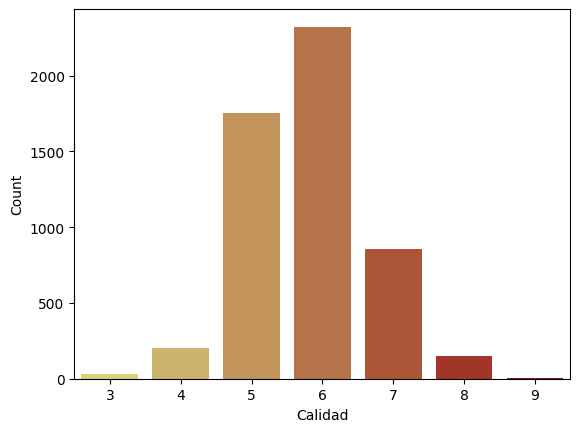

In [23]:
#Diagrama de Barras
sns.countplot(data=df_vinos, x='calidad', palette="blend:#e8e06e,#a90202")
plt.xlabel('Calidad')
plt.ylabel('Count')
plt.show()

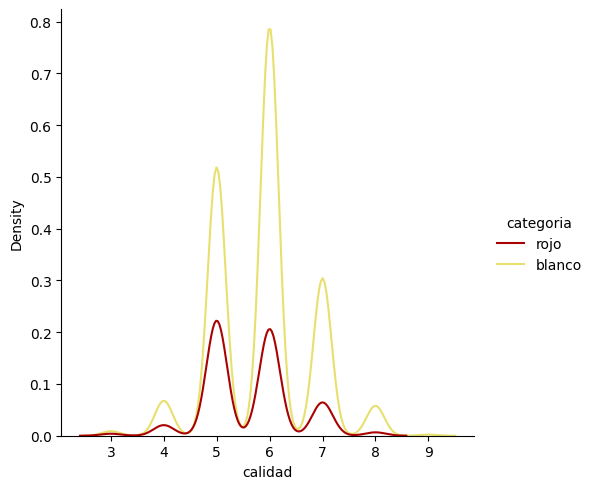

In [24]:
#Estimación de densidad de kernel de la variable 'calidad' por categoría
sns.displot(df_vinos, x="calidad", hue="categoria", kind="kde",palette=['#a90202', '#e8e06e'])
plt.show()

# 3. Procesamiento y análisis de datos

## 3.1 Segmentación de la variable calidad

Se pudo observar que la variable calidad es categórica en naturaleza. Crear categorías de calidad nos ayudará a entender mejor cómo se comporta la calidad en los vinos.
Definimos 5 segmentos:

- Bajo (Calidad inferior a 5)
- Medio Bajo (Calidad igual a 5)
- Medio (Calidad igual a 6)
- Medio Alto (Calidada igual a 7)
- Alto (Calidad superior a 7)

Luego aplicamos la categorización y agregamos una nueva columna al dataframe.

In [25]:
df_vinos['categoria_calidad'] = df_vinos['calidad'].apply(lambda x: 'Bajo' if x <= 4 else 'Medio Bajo' if x == 5  else 'Medio' if x==6 else 'Medio Alto' if x== 7 else 'Alto')
df_vinos.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,categoria,categoria_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,rojo,Medio Bajo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,rojo,Medio Bajo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,rojo,Medio Bajo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,rojo,Medio
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,rojo,Medio Bajo


In [26]:
df_vinos.describe(include = [object])

,categoria,categoria_calidad
count,5320,5320
unique,2,5
top,blanco,Medio
freq,3961,2323


## 3.2 Relacion entre variables: Correlacion

**CONSIDERACION SOBRE LA VARIABLE CALIDAD**:<BR>
La variable 'calidad' ha sido transformada de una variable categórica discreta a una representación numérica  en el rango de 3 a 9 para calcular la correlación con otras variables. Sin embargo, es importante tener en cuenta que su naturaleza original es categórica y que esta transformación implica ciertas consideraciones al interpretar los resultados de correlación. Aunque hemos proporcionado observaciones basadas en la correlación calculada, se recomienda utilizar métodos estadísticos más apropiados para analizar la relación entre variables categóricas y numéricas, teniendo en cuenta los posibles efectos no lineales y las limitaciones de esta representación numérica de 'calidad'.

### 3.2.1 Tratamiento de outliers

In [27]:
#METODO IQR

columns_of_interest = df_vinos.columns.drop(['categoria', 'categoria_calidad'])
print(columns_of_interest)
print('')

# Calcular los límites del rango intercuartílico (IQR) para cada columna
Q1 = df_vinos[columns_of_interest].quantile(0.25)
Q3 = df_vinos[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers usando el criterio del IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Obtener los outliers en cada columna
outliers = ((df_vinos[columns_of_interest] < lower_bound) | (df_vinos[columns_of_interest] > upper_bound)).any(axis=1)

# Registros que son outliers
print(df_vinos[outliers])

Index(['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual',
       'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')

      acidez_fija  acidez_volatil  acido_citrico  azucar_residual  cloruros  \
0             7.4            0.70           0.00              1.9     0.076   
1             7.8            0.88           0.00              2.6     0.098   
2             7.8            0.76           0.04              2.3     0.092   
3            11.2            0.28           0.56              1.9     0.075   
11            7.8            0.61           0.29              1.6     0.114   
...           ...             ...            ...              ...       ...   
5248          6.0            0.27           0.40              1.7     0.021   
5267          5.7            0.22           0.25              1.1     0.050   
5271          6.6            0.38           0.29              2

In [28]:
# Filtrar los registros sin outliers
df_vinos_filtered = df_vinos[~outliers]

print(df_vinos_filtered)

      acidez_fija  acidez_volatil  acido_citrico  azucar_residual  cloruros  \
4             7.4            0.66           0.00              1.8     0.075   
5             7.9            0.60           0.06              1.6     0.069   
6             7.3            0.65           0.00              1.2     0.065   
7             7.8            0.58           0.02              2.0     0.073   
8             7.5            0.50           0.36              6.1     0.071   
...           ...             ...            ...              ...       ...   
5315          6.2            0.21           0.29              1.6     0.039   
5316          6.6            0.32           0.36              8.0     0.047   
5317          6.5            0.24           0.19              1.2     0.041   
5318          5.5            0.29           0.30              1.1     0.022   
5319          6.0            0.21           0.38              0.8     0.020   

      dioxido_azufre_libre  dioxido_azufre_total  d

### 3.2.2 Matriz de correlaciones

In [29]:
# matriz de correlacions
vinos_corr = df_vinos_filtered.filter(['acidez_fija',	'acidez_volatil',	'acido_citrico',	'azucar_residual',	'cloruros',	'dioxido_azufre_libre',	'dioxido_azufre_total',	'densidad','pH',	'sulfatos',	'alcohol',	'calidad']).corr()
vinos_corr

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
acidez_fija,1.000000,0.144139,0.222729,-0.048140,0.314576,-0.182470,-0.168721,0.364016,-0.253640,0.136300,-0.106176,-0.094186
acidez_volatil,0.144139,1.000000,-0.443152,-0.116788,0.490163,-0.312410,-0.329276,0.266445,0.219441,0.204665,-0.062337,-0.230552
acido_citrico,0.222729,-0.443152,1.000000,0.154249,-0.198172,0.193383,0.261206,-0.002421,-0.260435,-0.030162,0.041999,0.102150
azucar_residual,-0.048140,-0.116788,0.154249,1.000000,-0.097139,0.426611,0.475007,0.572043,-0.220382,-0.132606,-0.321573,-0.056042
cloruros,0.314576,0.490163,-0.198172,-0.097139,1.000000,-0.217547,-0.293786,0.548921,0.250525,0.331064,-0.378793,-0.261744
dioxido_azufre_libre,-0.182470,-0.312410,0.193383,0.426611,-0.217547,1.000000,0.691978,0.119808,-0.156874,-0.138926,-0.188877,0.074745
dioxido_azufre_total,-0.168721,-0.329276,0.261206,0.475007,-0.293786,0.691978,1.000000,0.148338,-0.215655,-0.188305,-0.288454,-0.068406
densidad,0.364016,0.266445,-0.002421,0.572043,0.548921,0.119808,0.148338,1.000000,0.128124,0.236302,-0.749036,-0.333244
pH,-0.253640,0.219441,-0.260435,-0.220382,0.250525,-0.156874,-0.215655,0.128124,1.000000,0.275613,0.015151,0.052871
sulfatos,0.136300,0.204665,-0.030162,-0.132606,0.331064,-0.138926,-0.188305,0.236302,0.275613,1.000000,-0.036125,0.059069


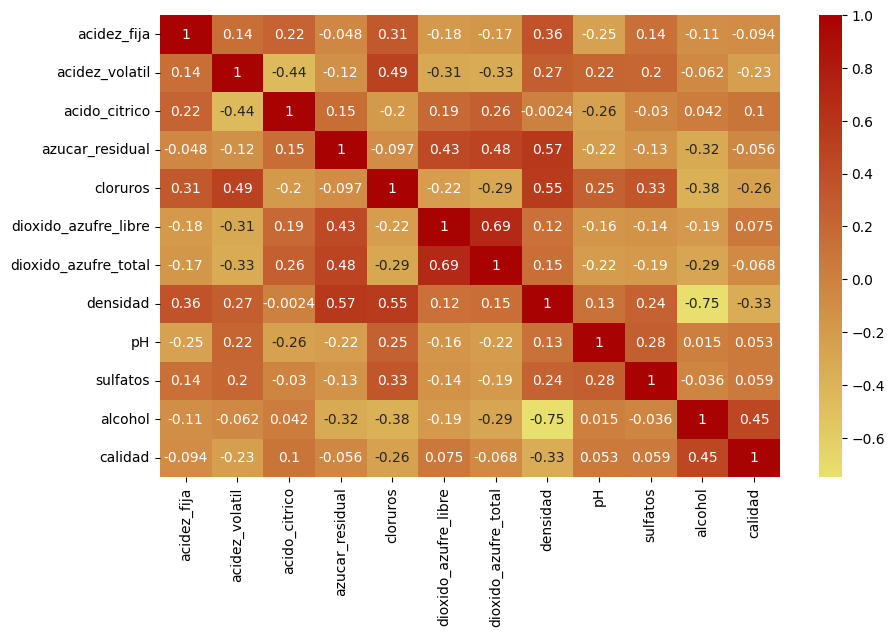

In [30]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(vinos_corr, cmap=sns.color_palette("blend:#e8e06e,#a90202", as_cmap=True), annot=True)
plt.show()

**OBSERVACIONES PARA ESTE CONJUNTO DE DATOS**

La variable *"calidad"* tiene:

-una correlación positiva moderada con la variable *"alcohol"* (0.45). Esto sugiere que a medida que aumenta el contenido de alcohol en el vino, es más probable que se clasifique con una calidad más alta.

-una correlación positiva débil con *"acido_citrico"* ,*"dioxido_azufre_libre"*, *"sulfatos"* y *"pH"*. Estas correlaciones son cercanas a cero, lo que indica que no hay una relación lineal clara entre estas variables y la calidad del vino.

-una correlación negativa débil con *"azucar_residual"*, *"dioxido_azufre_total"* Y *"acidez_fija"*. Estas correlaciones también están cerca de cero y sugieren una relación mínima con la calidad del vino.

-Las variables , *"acidez_volatil"*, *"cloruros"* y *"densidad"* tienen correlaciones negativas moderadas a fuertes con la variable "calidad". Esto indica que a medida que aumenta la acidez fija, la acidez volátil, los cloruros y la densidad, es más probable que la calidad del vino disminuya.


## 3.3 Impacto de los outliers en las variables categoricas

In [31]:
#Incluyendo outliers
df_vinos.describe(include=[object])

,categoria,categoria_calidad
count,5320,5320
unique,2,5
top,blanco,Medio
freq,3961,2323


In [32]:
#Excluyendo outliers
df_vinos_filtered.describe(include=[object])

,categoria,categoria_calidad
count,4081,4081
unique,2,4
top,blanco,Medio
freq,3384,1902


In [33]:
#Verificamos las categorías de calidad
for i in range(len(df_vinos_filtered['categoria_calidad'].unique())):
    print(df_vinos_filtered['categoria_calidad'].unique()[i])

Medio Bajo
Medio Alto
Bajo
Medio


Se concluye que la categoria de calidad 'Medio' es la más frecuente .

# 4. Visualización de datos

Se presentan de manera visual y tabular los hallazgos significativos, basados en los resultados obtenidos en el análisis previo (punto 3). Estas representaciones destacan las relaciones y patrones identificados, proporcionando una perspectiva más comprensible de los datos analizados.

## 4.1 Cantidades de vinos segun su categoria y calidad

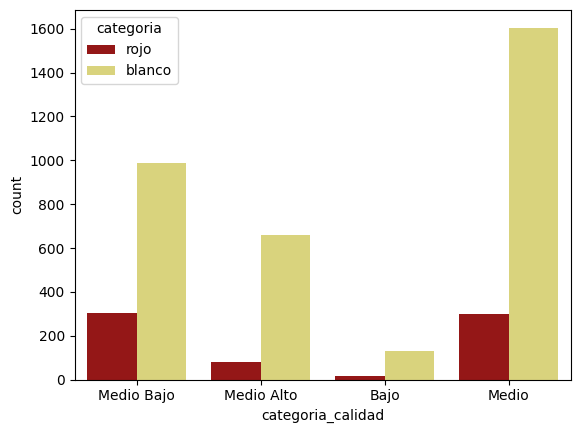

In [34]:
# Comparación por calidad entre vino rojo y blanco
sns.countplot(df_vinos_filtered, x='categoria_calidad', hue='categoria',palette=['#a90202', '#e8e06e'])
plt.show()

## 4.2 Tabla de correlación entre la calidad del vino y las variables independientes de estudio

In [35]:
correlation_quality = df_vinos_filtered[columns_of_interest].corr()['calidad'].sort_values(ascending=False)
print(correlation_quality)

calidad                 1.000000
alcohol                 0.453872
acido_citrico           0.102150
dioxido_azufre_libre    0.074745
sulfatos                0.059069
pH                      0.052871
azucar_residual        -0.056042
dioxido_azufre_total   -0.068406
acidez_fija            -0.094186
acidez_volatil         -0.230552
cloruros               -0.261744
densidad               -0.333244
Name: calidad, dtype: float64


## 4.3 Gráfico de violín: Variables con correlación moderada respecto a la calidad del vino

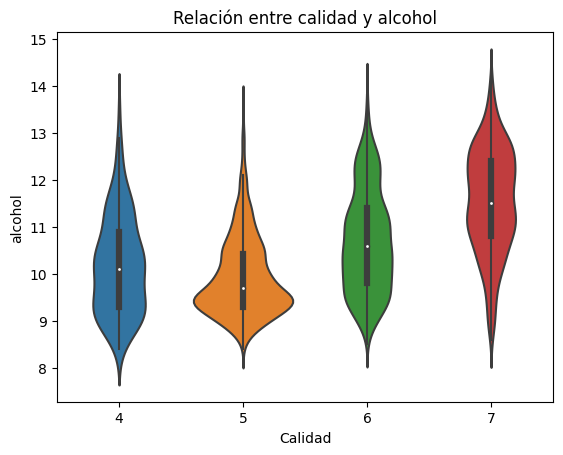

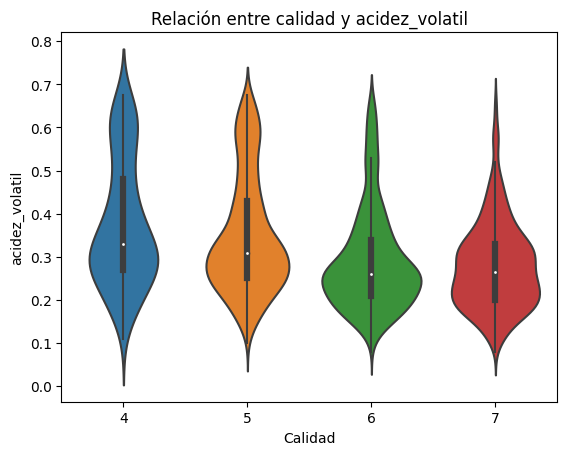

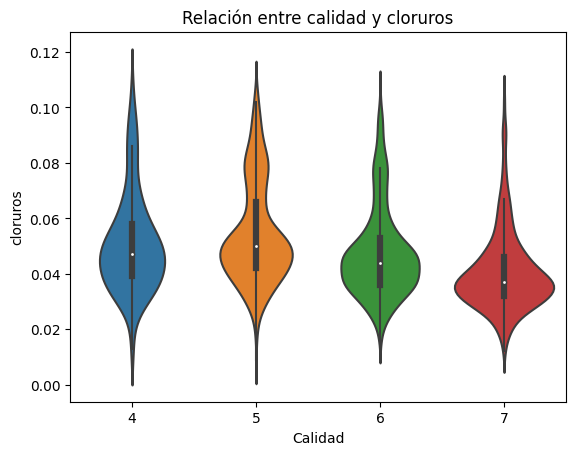

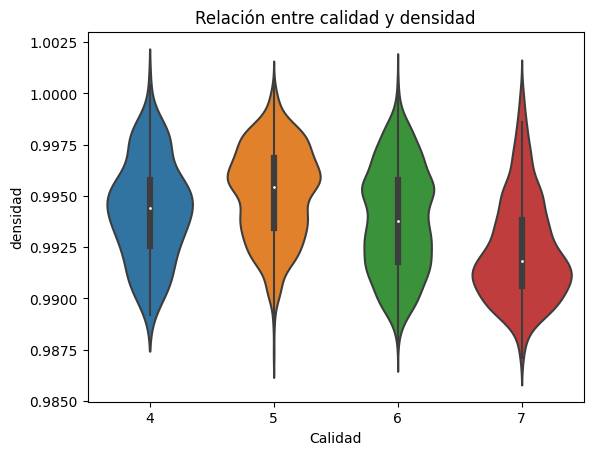

In [36]:
variables = ["alcohol", "acidez_volatil", "cloruros", "densidad"]

for variable in variables:
    sns.violinplot(data=df_vinos_filtered, x="calidad", y=variable)
    plt.title(f"Relación entre calidad y {variable}")
    plt.xlabel("Calidad")
    plt.ylabel(variable)
    plt.show()

## 4.4 Histogramas de las variables con correlacion moderada con la calidad del vino, segun categoria

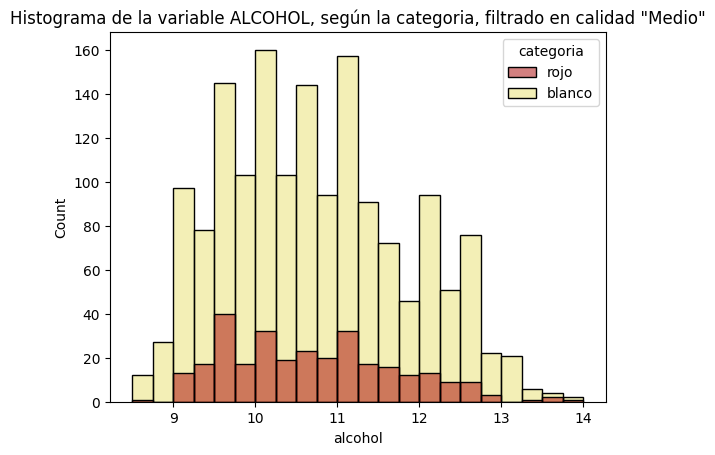

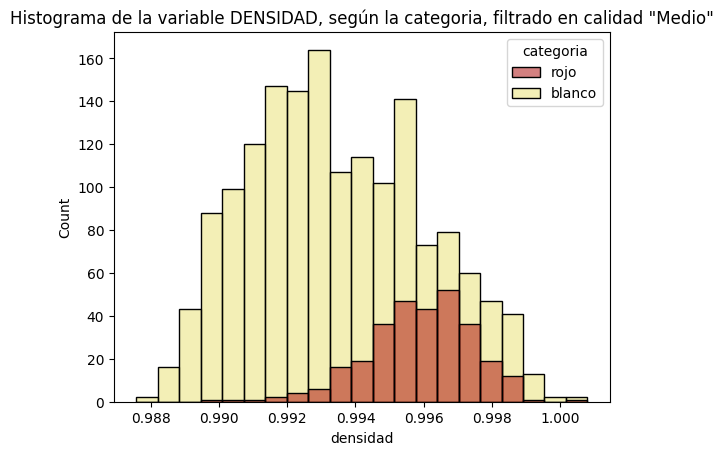

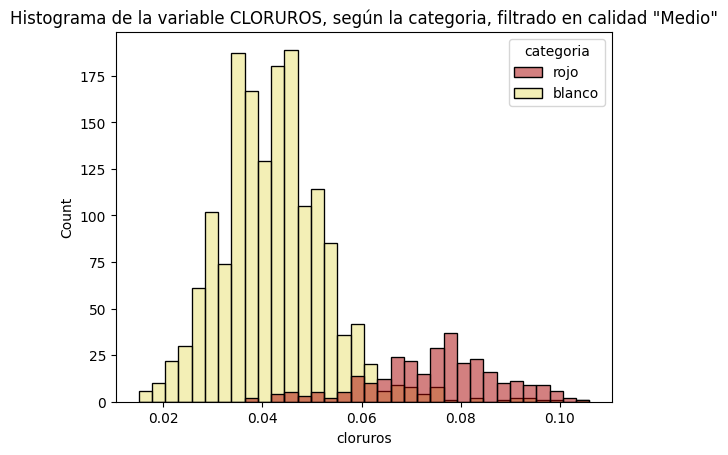

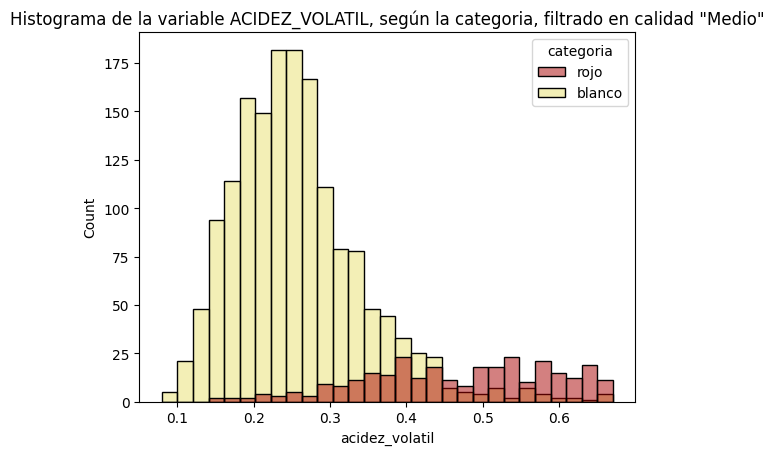

In [37]:
# Histograma alcohol, densidad, cloruros, acidez volatil sobre la categoria de calidad TOP: "Medio"
variables_analizadas = ['alcohol','densidad','cloruros','acidez_volatil']
for i in range(len(variables_analizadas)):
    grafico = sns.histplot(df_vinos_filtered[df_vinos_filtered['categoria_calidad'] == 'Medio'], x=variables_analizadas[i], hue='categoria',palette=['#a90202', '#e8e06e'])
    grafico.set_title(f'Histograma de la variable {variables_analizadas[i].upper()}, según la categoria, filtrado en calidad "Medio"')
    plt.show()


## 4.4 Graficos de dispersion: relacion entre las variables que presentaron cierta asociacion con la variable objetivo

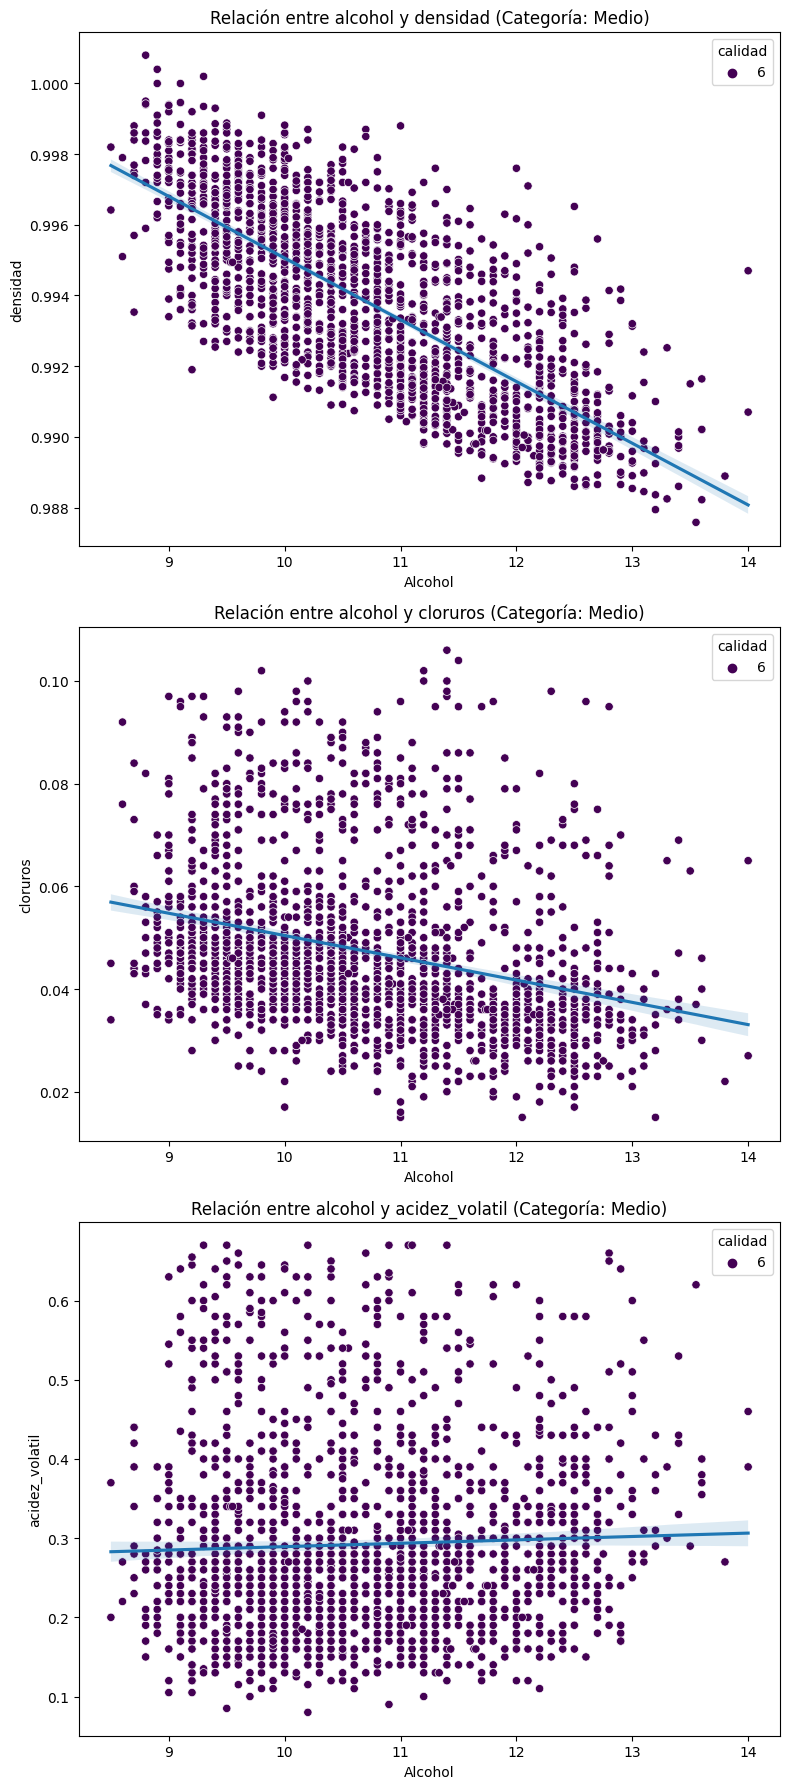

In [38]:
variables = ["densidad", "cloruros", "acidez_volatil"]

df_medio = df_vinos_filtered[df_vinos_filtered['categoria_calidad'] == 'Medio']

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 6 * len(variables)))

for i, variable in enumerate(variables):
    ax = axes[i]
    sns.scatterplot(data=df_medio, x="alcohol", y=variable, hue="calidad", palette="viridis", ax=ax)
    sns.regplot(data=df_medio, x="alcohol", y=variable, scatter=False, ax=ax)
    ax.set_title(f"Relación entre alcohol y {variable} (Categoría: Medio)")
    ax.set_xlabel("Alcohol")
    ax.set_ylabel(variable)

plt.tight_layout()
plt.show()


## 4.5 Distribusiones de variables con outliers

Por cuestiones de tiempo de procesado de datos, dejamos la imagen de las distribuciones y su código

>``` sns.pairplot(data=df_vinos, hue='categoria',palette=['#a90202', '#e8e06e']) ```
>
>``` plt.show() ```

 <img src= "https://drive.google.com/uc?id=1jvYXEr8BfgQ7cvjSboxmrFP1yH_R3C3v" alt="Mapa de disperción" style=" border-radius: 10px;">

## 4.6 Distribuciones de variables sin outliers

Por cuestiones de tiempo de procesado de datos, dejamos la imagen de las distribuciones y su código

>` sns.pairplot(data=df_vinos_filtered, hue='categoria',palette=['#a90202', '#e8e06e']) `
>
>` plt.show() `

 <img src="https://drive.google.com/uc?id=1jWZSmuGSUkcOGg7BuC5etlYpPPp71cuV" alt="Mapa de disperción" style=" border-radius: 10px;">

# 5. Ingeniería y selección de características



## 5.1 Testeo rápido de los modelos.

Importación de los modelos de la librería SKLEARN, en los que estamos interesados probar nuestros datos   

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


Asignación de variables para probar los modelos

In [41]:
x_1 = df_vinos.drop(["calidad", "categoria", "categoria_calidad"],axis=True)
y_1 = df_vinos["calidad"]


Primera prueba son Arboles de desiciones

[0.07847185 0.10030273 0.0823844  0.08284841 0.08471285 0.08671809
 0.08645206 0.08882072 0.08117378 0.08578834 0.14232677]


<Axes: >

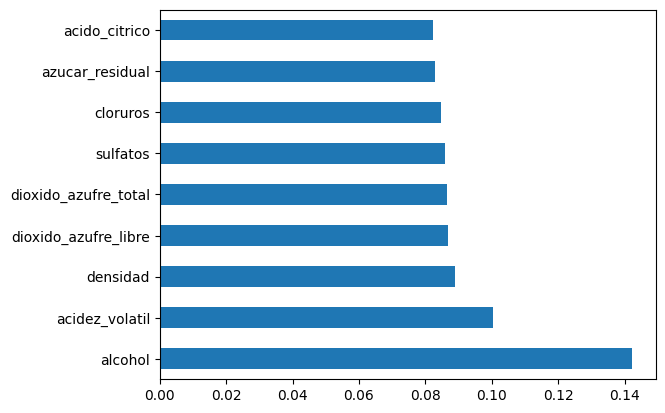

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_1, y_1)

df_vinos_filtered.head()

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index= x_1.columns)
feat_importances.nlargest(9).plot(kind='barh')


Se crea un diccionario con los diferentes modelos a entrenar, para luego explorar diferentes valores de hiperparámetros

In [43]:

model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,100,200],
            'kernel':["rbf"]
        }
    },

    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },

    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },

    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }

}


In [44]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(x_1,y_1)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(


Comparación de los resultados entre los distintos modelos

In [46]:
data_final = pd.DataFrame(score, columns=["Model","Best_Score","Best_Params"])

data_final

,Model,Best_Score,Best_Params
0,svm,0.429323,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.521992,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.506203,"{'max_depth': 8, 'n_estimators': 10}"
3,naive_bayes,0.418797,{}
4,logistic_regression,0.517105,{'C': 5}
